In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Espacenet_search_result.csv', delimiter=';')

In [3]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11'],
      dtype='object')

In [4]:
#some 
df[['first publication date','second publication date']] = df['Publication date'].str.split(' ' , n=1 , expand= True)
df['second publication date'] = df['second publication date'].str.strip('\n')
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,Unnamed: 11,first publication date,second publication date
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,NaN,2006-11-09,None
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,NaN,2023-12-01,None
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,NaN,2023-03-20,None
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,NaN,2011-02-17,2011-04-07
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,NaN,2022-05-05,None


In [5]:
df['first publication date']=pd.to_datetime(df['first publication date'])
df['second publication date']=pd.to_datetime(df['second publication date'])

In [6]:
#first filing country 
df[['first publication number', 'second publication number']] = df['Publication number'].str.split(' ' , n=1 , expand=True)



In [7]:
df['second publication number']=df['second publication number'].str.strip('\n')
df['first publication country'] = df['first publication number'].str[:2]
df['second publication country'] = df['second publication number'].str[:2]


In [8]:
df=df.drop('Unnamed: 11' , axis= 1 )


In [9]:
#first publication filing year is the year when the patent application was first submitted to a patent office 
df['first filing year'] = df['first publication date'].dt.year

In [10]:
#earliest priority is the date a patent application was filed anywhere in the world
df['Earliest priority'] = pd.to_datetime(df['Earliest priority'])
df['earliest priority year'] = df['Earliest priority'].dt.year

In [11]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020


In [12]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year'],
      dtype='object')

In [16]:
df['applicant country'] = df['Applicants'].str.extract(r'\[([A-Z]{2})\]')

In [15]:
df = df.dropna(subset=['Inventors'])

first filing analysis 


In [18]:
#fill empty applicats with their inventors
df['Applicants'] = df['Applicants'].fillna(df['Inventors'])

In [ ]:
#identiy the priority date : first filing year 
#difference between earliest filing and first filing ?
#count the number of first filing by year to observe trends over time and identify technology emergence years and growth periods 
#use first filing year for technology emergence and innovation trends and patent filing trends , competitor intelligence and market analysis 
#use earliest publication year for public awareness and technology diffusion 
#df_first_filing = df[['Title','Inventors','Applicants','first filing year', 'earliest priority year','IPC','CPC','first publication country']]
#df_grouped = df.groupby(['first publication country', df['first publication date'].dt.year]).size().unstack(fill_value=0)


In [19]:
df = df.reset_index(drop=True)


In [20]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,H04B1/20,"B60K6/20 (KR) \nB60K6/28 (KR) \nB60K6/30 (EP,U...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,B60L53/12 (KR) \nB60L53/38 (KR) \nB60L53/54 (K...,2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,Y02T10/70 (EP),2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,B60L11/18 \nB60W10/24 \nH02J7/00,B60K6/46 (EP) \nB60L15/2045 (EP) \nB60L58/12 (...,2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,H01M16/00 \nH01M8/04828 \nH02J7/34,B60K15/03006 (KR) \nB60L53/20 (KR) \nB60L53/50...,2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


In [22]:
df = df.dropna(subset=['Inventors','Applicants','IPC'])

In [23]:
#filling missing CPC values 
df['CPC'] = df['CPC'].fillna('unkown')
df.isnull().sum()

No                              0
Title                           0
Inventors                       0
Applicants                      0
Publication number              0
Earliest priority               0
IPC                             0
CPC                             0
Publication date                0
Earliest publication            0
Family number                   0
first publication date          0
second publication date       378
first publication number        0
second publication number     377
first publication country       0
second publication country    377
first filing year               0
earliest priority year          0
applicant country             351
dtype: int64

In [24]:
df['IPC'] = df['IPC'].str.split(r'\s+')



In [25]:
df['IPC']

0                                             [H04B1/20]
1      [B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...
2      [B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...
3                       [B60L11/18, B60W10/24, H02J7/00]
4                     [H01M16/00, H01M8/04828, H02J7/34]
                             ...                        
492                    [B60L53/00, B62K11/00, G07F15/00]
493                 [B60L11/18, H01M10/052, H01M10/0568]
494                                          [G06F17/50]
495                    [B60L50/40, B60L50/75, B60L58/40]
496                     [B60K1/04, B60L58/12, B60L58/18]
Name: IPC, Length: 494, dtype: object

In [26]:
import re

def split_cpc(classification):
    # Split only at ") " but keep the ")"
    parts = re.split(r'\)\s+', classification)  
    return [p + ')' if not p.endswith(')') else p for p in parts]  # Ensure each part ends with ')'

# Apply function to CPC column
df['CPC'] = df['CPC'].apply(split_cpc)



In [27]:
df['CPC'][1]

['B60L53/12 (KR)',
 'B60L53/38 (KR)',
 'B60L53/54 (KR)',
 'B60L53/665 (KR)',
 'B60L53/68 (KR)',
 'G06Q20/145 (KR)',
 'G06Q50/40 (KR)',
 'B60Y2200/91 (KR)',
 'Y02T90/12 (KR)']

In [28]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country'],
      dtype='object')

In [29]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


adding family mumbers column based on publication number and family number 

In [30]:
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,first publication date,second publication date,first publication number,second publication number,first publication country,second publication country,first filing year,earliest priority year,applicant country
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,AFS TRINITY POWER CORP [US],US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,2006-11-09,NaT,US2006250902A1,None,US,None,2006,2005,US
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,2023-12-01,NaT,KR20230163874A,None,KR,None,2023,2022,KR
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,HOGREENAIR CO LTD [KR],KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,2023-03-20,NaT,KR102511391B1,None,KR,None,2023,2022,KR
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,42183715,2011-02-17,2011-04-07,WO2011019133A2,WO2011019133A3,WO,WO,2011,2009,KR
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,SIGNET EV INC [KR] \nSIGNET ENERGY [KR],US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,75243546,2022-05-05,NaT,US2022140365A1,None,US,None,2022,2020,KR


**this one**

In [31]:
import time
import random
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import pandas as pd

class PatentsSearch:
    def __init__(self, headless=True):
        """Initialize the scraper with enhanced compatibility options."""
        # Create ChromeOptions
        options = uc.ChromeOptions()
        
        # Add headless mode if specified
        if headless:
            options.add_argument('--headless')
        
        # Additional options to improve compatibility
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        options.add_argument('--disable-blink-features=AutomationControlled')
        options.add_argument('--disable-extensions')
        
        try:
            # Try to create the driver with more robust initialization
            self.driver = uc.Chrome(
                options=options, 
                use_subprocess=True,  # Can help with version compatibility
                version_main=None,    # Auto-detect Chrome version
                suppress_welcome=True,
                debug=False
            )
            
            # Set additional driver properties
            self.driver.set_page_load_timeout(30)
            self.driver.set_window_size(1920, 1080)
        
        except Exception as e:
            print(f"Failed to initialize ChromeDriver: {e}")
            print("Trying alternative initialization method...")
            
            # Alternative initialization method
            self.driver = uc.Chrome(
                options=options,
                driver_executable_path=None  # Let it auto-find the driver
            )

    def add_random_delay(self, min_seconds=1, max_seconds=3):
        """Add a random delay to mimic human behavior."""
        time.sleep(random.uniform(min_seconds, max_seconds))

    def get_page_html(self, url):
        """Navigate to the given URL and return the page HTML."""
        try:
            print(f"Navigating to: {url}")
            self.driver.get(url)

            # Wait for the page to load completely
            WebDriverWait(self.driver, 20).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )

            # Add a random delay to mimic human behavior
            self.add_random_delay(3, 5)

            # Return the page HTML
            return self.driver.page_source

        except TimeoutException:
            print("Timed out waiting for the page to load.")
            return None
        except Exception as e:
            print(f"An error occurred: {e}")
            return None

    def parse_html(self, html):
        """Parse the HTML and extract all span elements inside the 'Published as' content."""
        soup = BeautifulSoup(html, 'html.parser')
        
        # Look for the element containing "Publié en tant que" or "Published as"
        published_as_element = soup.find(lambda tag: tag.name == "h5" and ("Publié en tant que" in tag.text or "Published as" in tag.text))
        
        if published_as_element:
            # Get the next sibling span that contains the relevant content
            content_element = published_as_element.find_next_sibling("span")
            if content_element:
                # Extract all span elements within the content
                spans = content_element.find_all('span')
                return [span.get_text(strip=True) for span in spans]
        return []

    def close(self):
        """Close the browser when done."""
        if self.driver:
            self.driver.quit()


# Example Usage:
if __name__ == '__main__':
    # Initialize the scraper
    scraper = PatentsSearch(headless=False)  # Set headless to False to see the browser in action

    # Create a DataFrame with family numbers and publication numbers
    #data = {
     #   'family_number': ['087517563', 'another_family_number'],  # Replace with actual family numbers
      #  'publication_number': ['GB2631304A', 'another_publication_number']  # Replace with actual publication numbers
  #  }
   # df = pd.DataFrame(data)

    # Create a new column for family members
    df['family_members'] = None

    try:
        for index, row in df.iterrows():
            # Construct the URL using family number and publication number
            url = f"https://worldwide.espacenet.com/patent/search/family/{row['Family number']}/publication/{row['first publication number']}?q=hydrogen%20battery"

            # Get the page HTML
            html = scraper.get_page_html(url)
            if html:
                print(f"Page HTML retrieved successfully for {row['first publication number']}.")
                # Parse the HTML to find the relevant content
                family_members = scraper.parse_html(html)
                df.at[index, 'family_members'] = family_members  # Store the result in the DataFrame
            else:
                print(f"Failed to retrieve the page HTML for {row['first publication number']}.")

    finally:
        # Close the browser
        scraper.close()
        print("Scraper closed.")

    # Display the DataFrame with
    df.head()

Navigating to: https://worldwide.espacenet.com/patent/search/family/37397092/publication/US2006250902A1?q=hydrogen%20battery
Page HTML retrieved successfully for US2006250902A1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/89124565/publication/KR20230163874A?q=hydrogen%20battery
Page HTML retrieved successfully for KR20230163874A.
Navigating to: https://worldwide.espacenet.com/patent/search/family/85796535/publication/KR102511391B1?q=hydrogen%20battery
Page HTML retrieved successfully for KR102511391B1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/42183715/publication/WO2011019133A2?q=hydrogen%20battery
Page HTML retrieved successfully for WO2011019133A2.
Navigating to: https://worldwide.espacenet.com/patent/search/family/75243546/publication/US2022140365A1?q=hydrogen%20battery
Page HTML retrieved successfully for US2022140365A1.
Navigating to: https://worldwide.espacenet.com/patent/search/family/63515557/publication/CN108550935A?q=hydrogen

In [32]:
df[['Family number','first publication number','family_members']].iloc[4]

Family number                                                        75243546
first publication number                                       US2022140365A1
family_members              [JP2022073928A, ;, KR102228132B1, ;, US2022140...
Name: 4, dtype: object

In [33]:
df['family_members'].iloc[4]

['JP2022073928A', ';', 'KR102228132B1', ';', 'US2022140365A1']

**this is just to not run the family number cell for 40 min **

df = pd.read_excel('data_with_family_members.xlsx')

In [38]:
df[['first applicant', 'second applicant']] = df['Applicants'].str.split('\n' , n=1 , expand=True)

In [39]:
df[['first applicant', 'second applicant']] 

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,SON JEONG KI [KR],None
2,HOGREENAIR CO LTD [KR],None
3,CHUNG YON JONG [KR],None
4,SIGNET EV INC [KR],SIGNET ENERGY [KR]
...,...,...
492,LIU ZHEN,None
493,SONY CORP,None
494,CORUN HYBRID POWER TECHNOLOGY CO LTD,None
495,UNIV HENAN SCIENCE & TECH,LONGMEN LABORATORY


**applicant type classification**


In [ ]:
import pandas as pd

def classify_applicant(applicant, inventors):
    if pd.isna(applicant):
        return "Unknown"
    applicant_lower = applicant.lower()
    
    # Corporations/Companies
    if any(keyword in applicant_lower for keyword in ["corp", "inc", "ltd", "co.", "llc", "ag", "gmbh", "co", "holdings", "ventures"]):
        if ("inc" or "corp" or "holdings" or "ventures")  in applicant_lower or "incorporated" in applicant_lower:
            return "Company - Incorporated/Corporation"
        elif ("ltd" or "llc" or "gmbh" or "kk" or "bv") in applicant_lower or "limited" in applicant_lower:
            return "Company - Limited"
        elif any(keyword in applicant_lower for keyword in ["s.a.", "sociedad anónima", "société anonyme"]):
            return "Company - Anonymous (S.A.)"
        else:
            return "Company - General"
    
    # Automotive manufacturers
    if any(keyword in applicant_lower for keyword in ["automobile", "motor", "vehicle", "auto" , "mobility","motors"]):
        return "Automotive Manufacturer"
    
    # Energy companies
    if any(keyword in applicant_lower for keyword in ["power", "energy", "fuel cell", "hydrogen"]):
        return "Energy Company"
    
    # Technology companies
    if any(keyword in applicant_lower for keyword in ["tech", "technology", "creative", "innovation" , "engineering" , "systems" , "digital" , "solutions"]):
        return "Technology Company"
    
    # Material Science/Nanotechnology companies
    if any(keyword in applicant_lower for keyword in ["nano", "material"]):
        return "Material Science/Nanotechnology Company"
    
    # Environmental protection companies
    if any(keyword in applicant_lower for keyword in ["environmental protection", "green air"]):
        return "Environmental Protection Company"
    
    # Universities/Research Institutions
    if any(keyword in applicant_lower for keyword in ["univ", "university", "college", "polytechnic", "institute", "school", "academia", "laboratory", "research"]):
        return "University/Research Institution"
    
    # Technical Universities
    if any(keyword in applicant_lower for keyword in ["teknik", "technical", "polytechnic"]):
        return "Technical University"
    
    # Research Laboratories
    if any(keyword in applicant_lower for keyword in ["laboratory", "institute"]):
        return "Research Laboratory"
    
    # Government/Public Institutions
    if any(keyword in applicant_lower for keyword in ["national", "government", "ministry", "agency"]):
        return "Government/Public Institution"
    
    # Individual Inventors 
    if applicant in inventors.values:
        return "Individual Inventor"
    if "[" in applicant and "]" in applicant:
        return "Individual Inventor"
    
    return "Individual Inventor"


#df['Applicant Type'] = df.apply(lambda row: classify_applicant(row['Applicants'], df['Inventors']), axis=1)



Applicant Type
Company - Limited                          208
Company - General                           88
Individual Inventor                         87
Technology Company                          34
University/Research Institution             28
Company - Incorporated/Corporation          26
Energy Company                              11
Automotive Manufacturer                      9
Material Science/Nanotechnology Company      3
Name: count, dtype: int64


In [40]:
df['first applicant type'] = df.apply(lambda row: classify_applicant(row['first applicant'], df['Inventors']), axis=1)
df['second applicant type'] = df.apply(lambda row: classify_applicant(row['second applicant'], df['Inventors']), axis=1)


In [45]:

first_applicant_type_counts = df['first applicant type'].value_counts()
first_applicant_type_counts

first applicant type
Company - Limited                          194
Company - General                           93
Individual Inventor                         92
Technology Company                          35
University/Research Institution             30
Company - Incorporated/Corporation          25
Energy Company                              13
Automotive Manufacturer                      9
Material Science/Nanotechnology Company      3
Name: count, dtype: int64

In [46]:
second_applicant_type_counts = df['second applicant type'].value_counts()
second_applicant_type_counts

second applicant type
Unknown                               415
Individual Inventor                    25
Company - Limited                      22
Company - General                      12
Automotive Manufacturer                 5
University/Research Institution         5
Energy Company                          4
Company - Incorporated/Corporation      3
Technology Company                      3
Name: count, dtype: int64

In [47]:
df[['first applicant','second applicant']]

,first applicant,second applicant
0,AFS TRINITY POWER CORP [US],None
1,SON JEONG KI [KR],None
2,HOGREENAIR CO LTD [KR],None
3,CHUNG YON JONG [KR],None
4,SIGNET EV INC [KR],SIGNET ENERGY [KR]
...,...,...
492,LIU ZHEN,None
493,SONY CORP,None
494,CORUN HYBRID POWER TECHNOLOGY CO LTD,None
495,UNIV HENAN SCIENCE & TECH,LONGMEN LABORATORY


In [41]:
df[['first applicant type','second applicant type']] 

,first applicant type,second applicant type
0,Company - General,Unknown
1,Individual Inventor,Unknown
2,Company - Limited,Unknown
3,Individual Inventor,Unknown
4,Company - Incorporated/Corporation,Energy Company
...,...,...
492,Individual Inventor,Unknown
493,Company - General,Unknown
494,Company - Limited,Unknown
495,Technology Company,University/Research Institution


In [48]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'first publication date',
       'second publication date', 'first publication number',
       'second publication number', 'first publication country',
       'second publication country', 'first filing year',
       'earliest priority year', 'applicant country', 'family_members',
       'Applicant Type', 'first applicant', 'second applicant',
       'first applicant type', 'second applicant type'],
      dtype='object')

In [50]:
df=df.drop('Applicants',axis=1)

In [51]:
df.to_csv('family_df.csv')

Individual contribution to patent filing : 
  - USPTO : 9% but this share has decreased by 13% over the past five years 
  - CNIPA : 8% down from 20% in the past 5 years
  - EPO : 4% 

In [55]:
df.head()

,No,Title,Inventors,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,Family number,...,second publication country,first filing year,earliest priority year,applicant country,family_members,Applicant Type,first applicant,second applicant,first applicant type,second applicant type
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,US2006250902A1,2005-05-05,[H04B1/20],"[B60K6/20 (KR), B60K6/28 (KR), B60K6/30 (EP,US...",2006-11-09,2006-11-09,37397092,...,None,2006,2005,US,[],Company - General,AFS TRINITY POWER CORP [US],None,Company - General,Unknown
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],KR20230163874A,2022-05-24,"[B60L53/12, B60L53/38, B60L53/54, B60L53/66, B...","[B60L53/12 (KR), B60L53/38 (KR), B60L53/54 (KR...",2023-12-01,2023-12-01,89124565,...,None,2023,2022,KR,[],Individual Inventor,SON JEONG KI [KR],None,Individual Inventor,Unknown
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,KR102511391B1,2022-09-20,"[B60L3/00, B60L53/16, B60L53/51, B60L53/54, B6...",[Y02T10/70 (EP)],2023-03-20,2023-03-20,85796535,...,None,2023,2022,KR,[KR102511391B1],Company - Limited,HOGREENAIR CO LTD [KR],None,Company - Limited,Unknown
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],WO2011019133A2 \nWO2011019133A3,2009-08-13,"[B60L11/18, B60W10/24, H02J7/00]","[B60K6/46 (EP), B60L15/2045 (EP), B60L58/12 (E...",2011-02-17 \n2011-04-07,2010-03-25,42183715,...,WO,2011,2009,KR,"[KR100949260B1, ;, WO2011019133A2, ;, WO201101...",Individual Inventor,CHUNG YON JONG [KR],None,Individual Inventor,Unknown
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,US2022140365A1,2020-11-02,"[H01M16/00, H01M8/04828, H02J7/34]","[B60K15/03006 (KR), B60L53/20 (KR), B60L53/50 ...",2022-05-05,2021-03-17,75243546,...,None,2022,2020,KR,"[JP2022073928A, ;, KR102228132B1, ;, US2022140...",Company - Incorporated/Corporation,SIGNET EV INC [KR],SIGNET ENERGY [KR],Company - Incorporated/Corporation,Energy Company


**applicant type percentage**

In [ ]:
# Create a list to hold the applicants
applicants = []

# Iterate through the DataFrame rows
for index, row in df.iterrows():
    # Get the first and second applicant values
    first_applicant = row['first applicant']
    second_applicant = row['second applicant']
    
    # Append the first applicant if it's not NaN
    if pd.notna(first_applicant):
        applicants.append(first_applicant)
    
    # Append the second applicant if it's not NaN
    if pd.notna(second_applicant):
        applicants.append(second_applicant)

# Create a new DataFrame from the applicants list
applicants_df = pd.DataFrame(applicants, columns=['Applicants'])

# Display the result
applicants_df


,Applicants
0,AFS TRINITY POWER CORP [US]
1,SON JEONG KI [KR]
2,HOGREENAIR CO LTD [KR]
3,CHUNG YON JONG [KR]
4,SIGNET EV INC [KR]
...,...
568,CORUN HYBRID POWER TECHNOLOGY CO LTD
569,UNIV HENAN SCIENCE & TECH
570,LONGMEN LABORATORY
571,SHANGHAI BAIKE INFORMATION TECH CO LTD


In [60]:
applicants_df['Applicant Type'] = applicants_df.apply(lambda row: classify_applicant(row['Applicants'], df['Inventors']), axis=1)

In [61]:
applicants_df

,Applicants,Applicant Type
0,AFS TRINITY POWER CORP [US],Company - General
1,SON JEONG KI [KR],Individual Inventor
2,HOGREENAIR CO LTD [KR],Company - Limited
3,CHUNG YON JONG [KR],Individual Inventor
4,SIGNET EV INC [KR],Company - Incorporated/Corporation
...,...,...
568,CORUN HYBRID POWER TECHNOLOGY CO LTD,Company - Limited
569,UNIV HENAN SCIENCE & TECH,Technology Company
570,LONGMEN LABORATORY,University/Research Institution
571,SHANGHAI BAIKE INFORMATION TECH CO LTD,Company - Limited


In [65]:
# Count the number of applicants by type
first_applicant_type_counts = applicants_df['Applicant Type'].value_counts()

# Compute percentages
total_applicants = len(df)
df_percentages = (first_applicant_type_counts / total_applicants) * 100
print("Applicant Type Percentages:")
print(df_percentages)


Applicant Type Percentages:
Applicant Type
Company - Limited                          43.724696
Individual Inventor                        23.684211
Company - General                          21.255061
Technology Company                          7.692308
University/Research Institution             7.085020
Company - Incorporated/Corporation          5.668016
Energy Company                              3.441296
Automotive Manufacturer                     2.834008
Material Science/Nanotechnology Company     0.607287
Name: count, dtype: float64


In [64]:
# Count the number of applicants by type
first_applicant_type_counts = df['first applicant type'].value_counts()

# Compute percentages
total_applicants = len(df)
df_percentages_1 = (first_applicant_type_counts / total_applicants) * 100
print("Applicant Type Percentages:")
print(df_percentages_1)



Applicant Type Percentages:
first applicant type
Company - Limited                          39.271255
Company - General                          18.825911
Individual Inventor                        18.623482
Technology Company                          7.085020
University/Research Institution             6.072874
Company - Incorporated/Corporation          5.060729
Energy Company                              2.631579
Automotive Manufacturer                     1.821862
Material Science/Nanotechnology Company     0.607287
Name: count, dtype: float64


In [53]:
second_applicant_type_counts = df['second applicant type'].value_counts()

# Compute percentages
total_applicants = len(df)
df_percentages_2 = (second_applicant_type_counts / total_applicants) * 100
print("Applicant Type Percentages:")
print(df_percentages_2)

Applicant Type Percentages:
second applicant type
Unknown                               84.008097
Individual Inventor                    5.060729
Company - Limited                      4.453441
Company - General                      2.429150
Automotive Manufacturer                1.012146
University/Research Institution        1.012146
Energy Company                         0.809717
Company - Incorporated/Corporation     0.607287
Technology Company                     0.607287
Name: count, dtype: float64


**top 10% of actors**

In [ ]:
# Step 1: Count occurrences of each applicant
applicant_counts = applicants_df['Applicants'].value_counts()

# Step 2: Get the top 10 applicants and convert to DataFrame
top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count'] 

# Step 3: Calculate the total number of patents
total_patents = top_10_applicants_df['Patent Count'].sum()

# Step 4: Calculate the contribution of each applicant
top_10_applicants_df['Contribution (%)'] = (top_10_applicants_df['Patent Count'] / total_patents) * 100

# Display the results
print("Top 10 Applicants by Number of Patents Filed with Contribution:")
top_10_applicants_df

Top 10 Applicants by Number of Patents Filed with Contribution:


,Applicant,Patent Count,Contribution (%)
0,SHANGHAI HYDROGEN MOBILE REFORMER INSTR CO LTD,9,13.043478
1,GUANGDONG HYDROGEN ENERGY SCIENCE & TECH CO LTD,8,11.594203
2,CHINA RAILWAY CONSTRUCTION CORP LTD,7,10.144928
3,CHINA RAILWAY CONSTR GROUP CO,7,10.144928
4,MITSUBISHI MOTORS CORP,7,10.144928
5,UNIV HENAN SCIENCE & TECH,7,10.144928
6,CHINA RAILWAY CONSTR GROUP CO,7,10.144928
7,YOUON TECH CO LTD,6,8.695652
8,SONY CORP,6,8.695652
9,BEIQI FOTON MOTOR CO LTD,5,7.246377


In [99]:
# Step 1: Count occurrences of each applicant
applicant_counts = applicants_df['Applicants'].value_counts()

# Step 2: Get the top 10 applicants and convert to DataFrame
top_10_applicants_df = applicant_counts.head(10).reset_index()
top_10_applicants_df.columns = ['Applicant', 'Patent Count']  # Rename columns

# Step 3: Calculate the total number of patents filed by all applicants
total_patents = applicants_df['Applicants'].count()

# Step 4: Calculate the total number of patents filed by the top 10 applicants
total_top_10_patents = top_10_applicants_df['Patent Count'].sum()

# Step 5: Compute the overall percentage contribution of the top 10 applicants
percentage_top_10_contribution = (total_top_10_patents / total_patents) * 100

# Display the results
print(f"Percentage Contribution of Top 10 Applicants: {percentage_top_10_contribution:.2f}%")
innovation_cycle = ""
if percentage_top_10_contribution >=50:
    innovation_cycle = "the innovation cycle is Ending"
elif 30 <= percentage_top_10_contribution < 50:
     innovation_cycle = "the innovation cycle is Slowing"
elif 20 <= percentage_top_10_contribution < 30:
     innovation_cycle = "the innovation cycle is Ongoing"
elif 10 <= percentage_top_10_contribution < 20:
     innovation_cycle = "the innovation cycle is Beginning"
elif percentage_top_10_contribution < 10:
     innovation_cycle = "the innovation cycle is Emmerging"

print(innovation_cycle)

Percentage Contribution of Top 10 Applicants: 12.04%
the innovation cycle is Beginning


In [68]:
# Co-Applicant Rate
#num_patents_with_multiple_applicants = df['Applicants'].str.contains('\n').sum()
num_patents_with_multiple_applicants = (df['second applicant'].notna()).sum()
total_patents = len(df)
co_applicant_rate = (num_patents_with_multiple_applicants / total_patents) * 100
print(f"Co-Applicant Rate: {co_applicant_rate:.2f}%")

Co-Applicant Rate: 15.99%


In [81]:


# Step 1: Group by 'first filing year' and count the number of patents
patent_counts = df.groupby('first filing year').size().reset_index(name='Patent Count')

# Step 2: Calculate the cumulative sum of patents
patent_counts['Cumulative Count'] = patent_counts['Patent Count'].cumsum()

# Step 3: Calculate the change in the number of patents
patent_counts['Change in Patents'] = patent_counts['Patent Count'].diff()

# Step 4: Calculate the average cumulative patents
patent_counts['Average Cumulative'] = (patent_counts['Cumulative Count'] + patent_counts['Cumulative Count'].shift(1)) / 2

# Step 5: Calculate the growth rate
patent_counts['Growth Rate'] = patent_counts['Change in Patents'] / patent_counts['Average Cumulative']

# Step 6: Convert to percentage and handle NaN values
patent_counts['Growth Rate'] = patent_counts['Growth Rate'].fillna(0) * 100

# Step 7: Sort the DataFrame by 'first filing year' in descending order
patent_counts_sorted = patent_counts.sort_values('first filing year', ascending=False)

# Display the results
patent_counts_sorted[['first filing year', 'Patent Count', 'Cumulative Count', 'Growth Rate']].head()


,first filing year,Patent Count,Cumulative Count,Growth Rate
32,2025,1,494,-8.510638
31,2024,43,493,-3.605514
30,2023,60,450,1.666667
29,2022,53,390,4.126547
28,2021,38,337,0.314465


In [85]:
from datetime import date
current_year = date.today().year
start_year = current_year - 2
end_year = start_year - 5


print('current: ' , current_year , 'start : ' , start_year , 'end : ' , end_year)

current:  2025 start :  2023 end :  2018


In [91]:


years_of_interest = patent_counts_sorted[patent_counts_sorted['first filing year'].isin([end_year, start_year])]


patents_endY = years_of_interest[years_of_interest['first filing year'] == 2018]['Patent Count'].values[0]
patents_startY = years_of_interest[years_of_interest['first filing year'] == 2023]['Patent Count'].values[0]

if patents_endY > 0:  
    GR = ((patents_startY - patents_endY) / patents_endY) * 100
else:
    GR = None  

print(f"\nGrowth Rate from {end_year} to {start_year}: {GR:.2f}%")


if GR >=50:
    print ("the technology is Booming")
elif 20 <= GR < 50:
    print ("the technology is Trending")
elif 10 <= GR < 20:
    print ("the technology is Quite_Trending")
elif 0 <= GR < 10:
    print ("the technology is Steady")
elif GR < 0:
    print ("the technology is Declining")


Growth Rate from 2018 to 2023: 62.16%
the technology is Booming


**market cost**


In [168]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11',
       'first publication date', 'second publication date',
       'first publication number', 'second publication number',
       'first publication country', 'second publication country',
       'first filing year', 'earliest priority year', 'applicant country',
       'Applicant Type', 'Primary_CPC', 'Country', 'Publication Year'],
      dtype='object')

In [144]:
country_codes = pd.read_excel('market_cost.xlsx' , sheet_name="country codes")
cost_over_time = pd.read_excel('market_cost.xlsx' , sheet_name='patent-costs-by-country-csv-fil')

In [164]:
country_codes.loc[1,'Country'] = 'PCT'

In [161]:
cost_over_time.head()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,United States,2500,3500,7000,1500,1500,16000
1,PCT,2500,1000,1000,500,500,5500
2,EPO via PCT,1000,5000,1000,500,500,8000
3,South Korea,1000,4000,4000,7000,9000,25000
4,Japan,1000,5000,5000,5000,7000,23000


In [166]:
# Iterate over cost_over_time and replace 'Country' if match found
for index, row in cost_over_time.iterrows():
    match = country_codes[country_codes['Country'] == row['Country']]
    if not match.empty:
        cost_over_time.loc[index, 'Country'] = match['Country Code'].iloc[0]

cost_over_time.head()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
0,US,2500,3500,7000,1500,1500,16000
1,PCT,2500,1000,1000,500,500,5500
2,EPO,1000,5000,1000,500,500,8000
3,KR,1000,4000,4000,7000,9000,25000
4,JP,1000,5000,5000,5000,7000,23000


In [ ]:
import pandas as pd

# Assuming cost is already loaded as a DataFrame
# Example:
# cost = pd.read_excel('your_file.xlsx', sheet_name='Sheet6')
#WO,4500,3000,1500,1000,1000,9000

# Define the new row for WO
# wo_row = {
#     'Country': 'WO',
#     'Years 0.0-1.5': 4500,
#     'Years 2.0-4.5': 3000,  
#     'Years 5.0-9.5': 1500,  # cost for 5.0-9.5 years
#     'Years 10.0-14.5': 1000,  #  cost for 10.0-14.5 years
#     'Years 15.0-20.0': 1000,  # cost for 15.0-20.0 years
#     'Total Cost (US$)': 9000  # total cost
# }
wo_row = {
    'Country': 'WO',
    'Years 0.0-1.5': 5000,   # PCT international phase (filing, search, attorney)
    'Years 2.0-4.5': 12000,  # National phase entry in 3-5 countries + early maintenance
    'Years 5.0-9.5': 8500,   # Mid-term maintenance (US 7.5yr + EP years 5-9)
    'Years 10.0-14.5': 12700, # Late maintenance (US 11.5yr + EP years 10-14)
    'Years 15.0-20.0': 5300,  # Final maintenance (EP years 15-20)
    'Total Cost (US$)': 43500  # 20-year total with 5-country protection
}
# Convert the new row to a DataFrame
wo_df = pd.DataFrame([wo_row])

# Append the new row to the cost DataFrame
cost = pd.concat([cost_over_time, wo_df], ignore_index=True)

# Save the updated cost DataFrame (optional)
cost.to_excel('updated_cost_data.xlsx', index=False)

# Display the updated cost DataFrame
cost.tail()

   Country  Years 0.0-1.5  Years 2.0-4.5  Years 5.0-9.5  Years 10.0-14.5  \
51      BD           1000           1000            500              500   
52      LU            500           1000            500              500   
53      NZ            500            500           1000              500   
54      ZA            500           1000            500              500   
55      WO           4500           3000           1500             1000   

    Years 15.0-20.0  Total Cost (US$)  
51              500              3500  
52              500              3000  
53             1000              3500  
54              500              3000  
55             1000              9000  


In [174]:
cost.tail()

,Country,Years 0.0-1.5,Years 2.0-4.5,Years 5.0-9.5,Years 10.0-14.5,Years 15.0-20.0,Total Cost (US$)
51,BD,1000,1000,500,500,500,3500
52,LU,500,1000,500,500,500,3000
53,NZ,500,500,1000,500,1000,3500
54,ZA,500,1000,500,500,500,3000
55,WO,4500,3000,1500,1000,1000,9000


In [176]:
import pandas as pd
from datetime import datetime

# Assuming df and cost are already loaded as DataFrames
# Example:
# df = pd.read_excel('your_file.xlsx', sheet_name='Sheet1')
# cost = pd.read_excel('your_file.xlsx', sheet_name='Sheet6')

# Get the current year
current_year = datetime.now().year

# Ensure 'Earliest priority year' is treated as an integer (year only)
df['Earliest priority'] = pd.to_datetime(df['Earliest priority'], errors='coerce').dt.year

# Calculate the age of each patent
df['Patent Age'] = current_year - df['Earliest priority']

# Define a function to assign cost based on age and country
def assign_cost(row, cost_df):
    country = row['Country']
    age = row['Patent Age']
    
    # Filter the cost DataFrame for the matching country
    cost_row = cost_df[cost_df['Country'] == country]
    
    if not cost_row.empty:
        if age <= 1.5:
            return cost_row['Years 0.0-1.5'].values[0]
        elif age <= 4.5:
            return cost_row['Years 2.0-4.5'].values[0]
        elif age <= 9.5:
            return cost_row['Years 5.0-9.5'].values[0]
        elif age <= 14.5:
            return cost_row['Years 10.0-14.5'].values[0]
        elif age <= 20.0:
            return cost_row['Years 15.0-20.0'].values[0]
        else:
            return cost_row['Total Cost (US$)'].values[0]  # For patents older than 20 years
    else:
        return None  # If no matching country is found in the cost DataFrame

# Apply the function to assign the cost value
df['patent cost'] = df.apply(lambda row: assign_cost(row, cost), axis=1)

# Save the updated DataFrame (optional)
df.to_excel('dataset_with_assigned_cost.xlsx', index=False)

# Display the updated DataFrame
df.head()

,No,Title,Inventors,Applicants,Publication number,Earliest priority,IPC,CPC,Publication date,Earliest publication,...,first filing year,earliest priority year,applicant country,Applicant Type,Primary_CPC,Country,Publication Year,Patent Age,Assigned Cost,patent cost
0,1,Plug-in hybrid vehicle with fast energy storage,BENDER DONALD A [US] \nDESHMANE ATUL [US] \nME...,[AFS TRINITY POWER CORP [US]],US2006250902A1,1970,H04B1/20,"[B60K6/20 (KR) , B60K6/28 (KR) , B60K6/30 (EP,...",2006-11-09,2006-11-09,...,2006,2005,US,Company - General,B60K6/20 (KR),US,2006.0,55,16000.0,16000.0
1,2,Electric vehicle wireless charging system thro...,SON JEONG KI [KR],[SON JEONG KI [KR]],KR20230163874A,1970,B60L53/12 \nB60L53/38 \nB60L53/54 \nB60L53/66 ...,"[B60L53/12 (KR) , B60L53/38 (KR) , B60L53/54 (...",2023-12-01,2023-12-01,...,2023,2022,KR,Individual Inventor,B60L53/12 (KR),KR,2023.0,55,25000.0,25000.0
2,3,Electric vehicle charging system using hydroge...,HONG SEONG HO,[HOGREENAIR CO LTD [KR]],KR102511391B1,1970,B60L3/00 \nB60L53/16 \nB60L53/51 \nB60L53/54 \...,[Y02T10/70 (EP)],2023-03-20,2023-03-20,...,2023,2022,KR,Company - Limited,Y02T10/70 (EP),KR,2023.0,55,25000.0,25000.0
3,4,BATTERY-CHARGING SYSTEM FOR AN ELECTRIC VEHICLE,CHUNG YON JONG [KR],[CHUNG YON JONG [KR]],WO2011019133A2 \nWO2011019133A3,1970,B60L11/18 \nB60W10/24 \nH02J7/00,"[B60K6/46 (EP) , B60L15/2045 (EP) , B60L58/12 ...",2011-02-17 \n2011-04-07,2010-03-25,...,2011,2009,KR,Individual Inventor,B60K6/46 (EP),WO,NaN,55,9000.0,9000.0
4,5,ESS SYSTEM FOR CHARGING FUEL CELL ELECTRIC VEH...,MUN TAEEUN [KR] \nCHAE HO BYUNG [KR] \nSHIN JO...,"[SIGNET EV INC [KR] , SIGNET ENERGY [KR]]",US2022140365A1,1970,H01M16/00 \nH01M8/04828 \nH02J7/34,"[B60K15/03006 (KR) , B60L53/20 (KR) , B60L53/5...",2022-05-05,2021-03-17,...,2022,2020,KR,Company - Incorporated/Corporation,B60K15/03006 (KR),US,2022.0,55,16000.0,16000.0


In [186]:
df = df.drop('Assigned Cost' , axis= 1)

In [187]:
df.columns

Index(['No', 'Title', 'Inventors', 'Applicants', 'Publication number',
       'Earliest priority', 'IPC', 'CPC', 'Publication date',
       'Earliest publication', 'Family number', 'Unnamed: 11',
       'first publication date', 'second publication date',
       'first publication number', 'second publication number',
       'first publication country', 'second publication country',
       'first filing year', 'earliest priority year', 'applicant country',
       'Applicant Type', 'Primary_CPC', 'Country', 'Publication Year',
       'Patent Age', 'patent cost', 'Patent Value', 'Market Rate',
       'Mean Value'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   No                          497 non-null    int64         
 1   Title                       497 non-null    object        
 2   Inventors                   497 non-null    object        
 3   Applicants                  497 non-null    object        
 4   Publication number          497 non-null    object        
 5   Earliest priority           497 non-null    int32         
 6   IPC                         494 non-null    object        
 7   CPC                         440 non-null    object        
 8   Publication date            497 non-null    object        
 9   Earliest publication        497 non-null    object        
 10  Family number               497 non-null    int64         
 11  Unnamed: 11                 0 non-null      float64       

In [182]:
df.to_csv('data_with_cost.csv')

In [181]:
import pandas as pd

# Assuming df is already loaded as a DataFrame and contains the 'Assigned Cost' column
# Example:
# df = pd.read_excel('updated_dataset_with_assigned_cost.xlsx')

# Calculate Market Value
market_value = df['patent cost'].sum()

# Calculate Patent Value (already in the 'Assigned Cost' column)
df['Patent Value'] = df['patent cost']

# Calculate Market Rate
market_rate = market_value / len(df)

# Calculate Mean Value of Patents (same as Market Rate)
mean_value = market_rate

# Print the results
print(f"Market Value: ${market_value:,.2f}")
print(f"Market Rate: ${market_rate:,.2f} per patent")
print(f"Mean Value of Patents: ${mean_value:,.2f}")

# Add Market Rate and Mean Value to the DataFrame (optional)
df['Market Rate'] = market_rate
df['Mean Value'] = mean_value

# Save the updated DataFrame (optional)
#df.to_excel('final_dataset_with_values.xlsx', index=False)

# Display the updated DataFrame
#df.head()

Market Value: $7,780,500.00
Market Rate: $15,654.93 per patent
Mean Value of Patents: $15,654.93


**market analysis**

**visualisations and plots**


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

clean data

In [146]:
# Split CPC codes into lists (assuming CPC entries are separated by ';')
df['CPC'] = df['CPC'].str.split('\n')

# Extract primary CPC codes (e.g., B60K6/20)
df['Primary_CPC'] = df['CPC'].apply(lambda x: x[0].strip() if isinstance(x, list) else np.nan)

# Clean applicants (split into lists)
df['Applicants'] = df['Applicants'].str.split('\n')

C:\Users\tasni\AppData\Local\Temp\ipykernel_27924\86998538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Applicant', data=applicant_df, palette='magma')


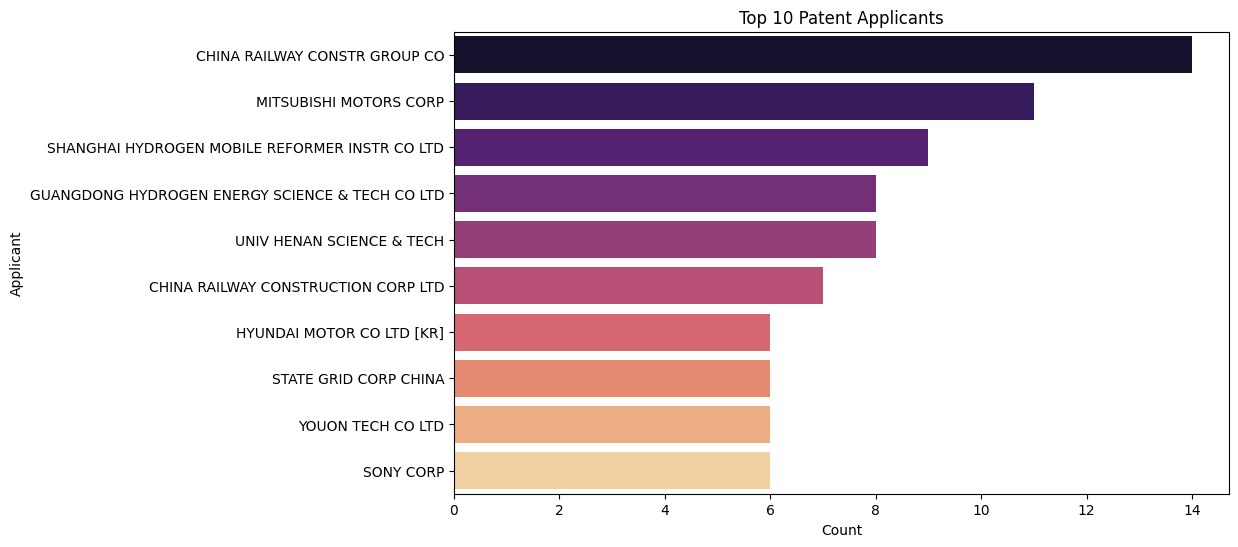

In [147]:
# Split applicants by newline characters
#df['Applicants'] = df['Applicants'].str.split('\n')

# Flatten applicants (remove empty strings and strip whitespace)
all_applicants = [applicant.strip() for sublist in df['Applicants'].dropna() for applicant in sublist if applicant.strip()]

# Count applicant frequencies
applicant_counts = Counter(all_applicants).most_common(10)
applicant_df = pd.DataFrame(applicant_counts, columns=['Applicant', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Applicant', data=applicant_df, palette='magma')
plt.title('Top 10 Patent Applicants')
plt.show()

Network Analysis of Applicants

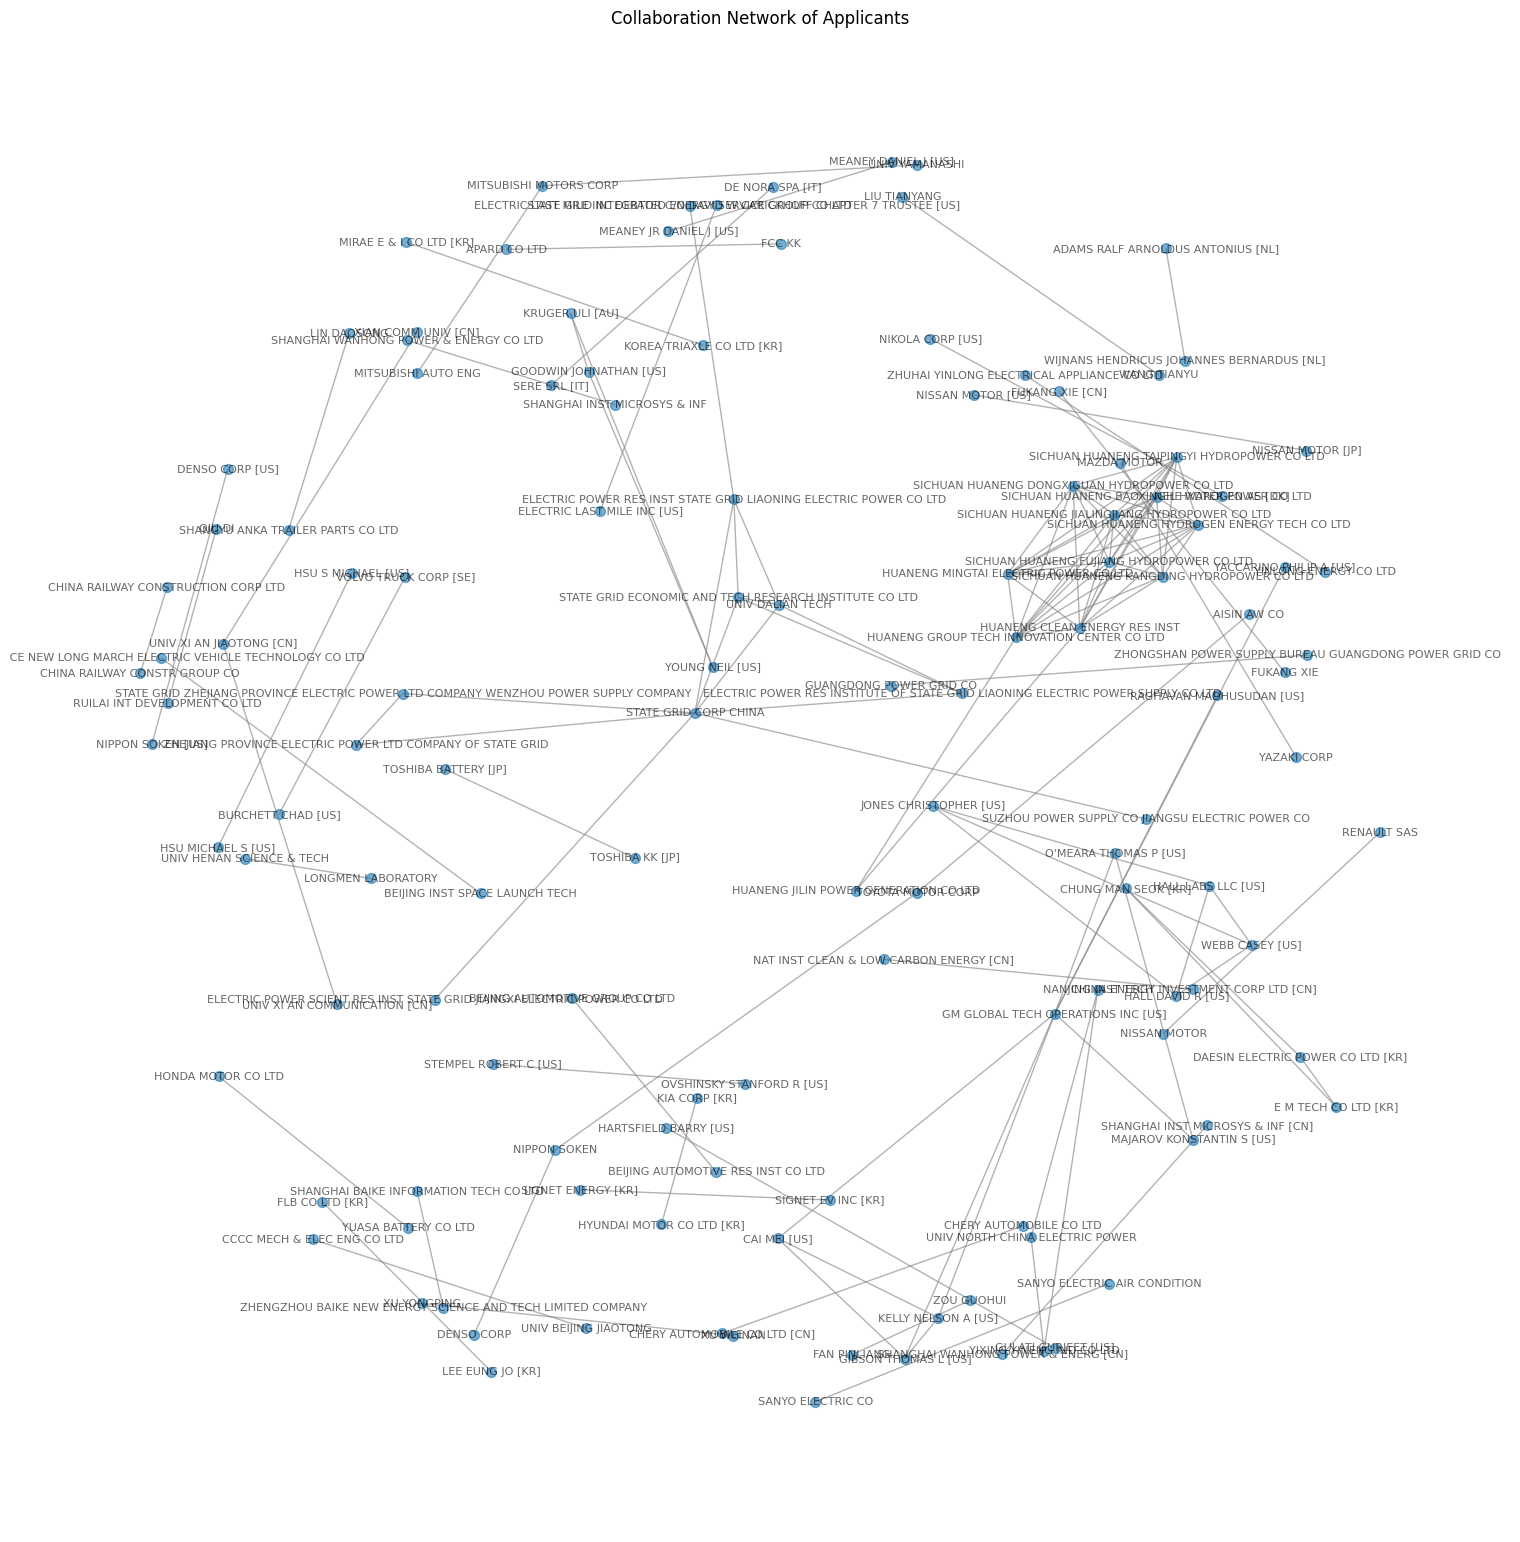

In [148]:
import networkx as nx
# Create a co-applicant network
G = nx.Graph()

for applicants in df['Applicants'].dropna():
    applicants_list = [app.strip() for app in applicants if app.strip()]
    for i in range(len(applicants_list)):
        for j in range(i+1, len(applicants_list)):
            if G.has_edge(applicants_list[i], applicants_list[j]):
                G[applicants_list[i]][applicants_list[j]]['weight'] += 1
            else:
                G.add_edge(applicants_list[i], applicants_list[j], weight=1)

# Visualize the network
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, alpha=0.6, edge_color='gray')
plt.title('Collaboration Network of Applicants')
plt.show()

In [ ]:
# Combine all applicants into a single string
applicants_text = ' '.join(all_applicants)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(applicants_text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Applicants in Hydrogen-Electric Vehicle Patents')
plt.show()

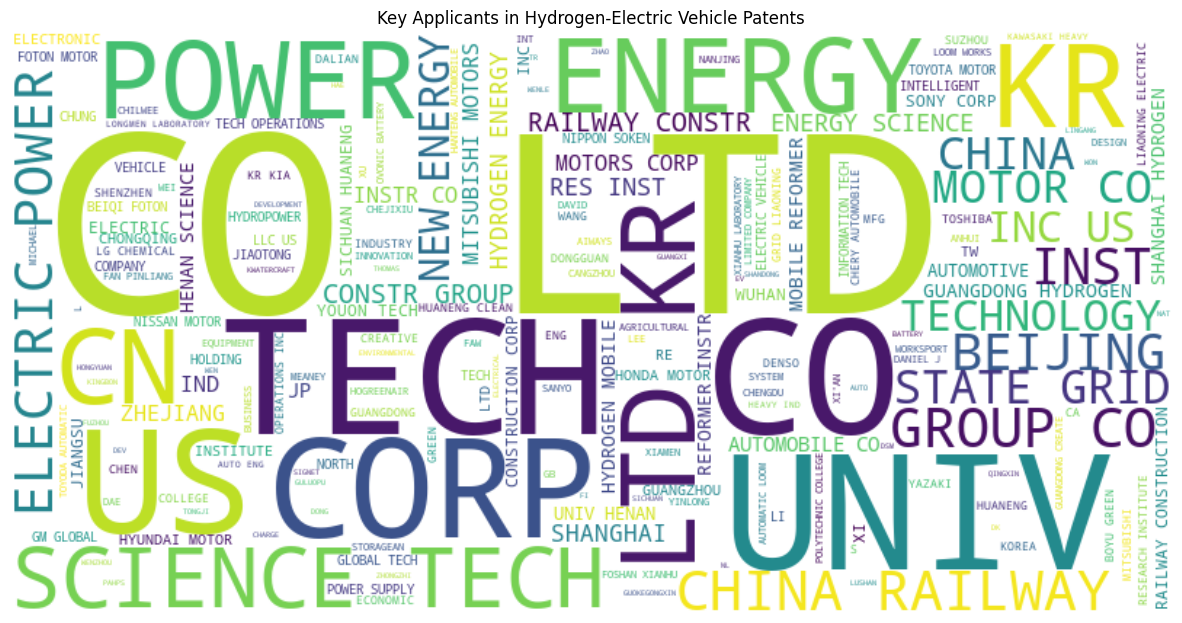

In [149]:
# Combine all applicants into a single string
applicants_text = ' '.join(all_applicants)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(applicants_text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Applicants in Hydrogen-Electric Vehicle Patents')
plt.show()

top cpc codes

C:\Users\tasni\AppData\Local\Temp\ipykernel_27924\3184344082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='CPC', data=cpc_df, palette='viridis')


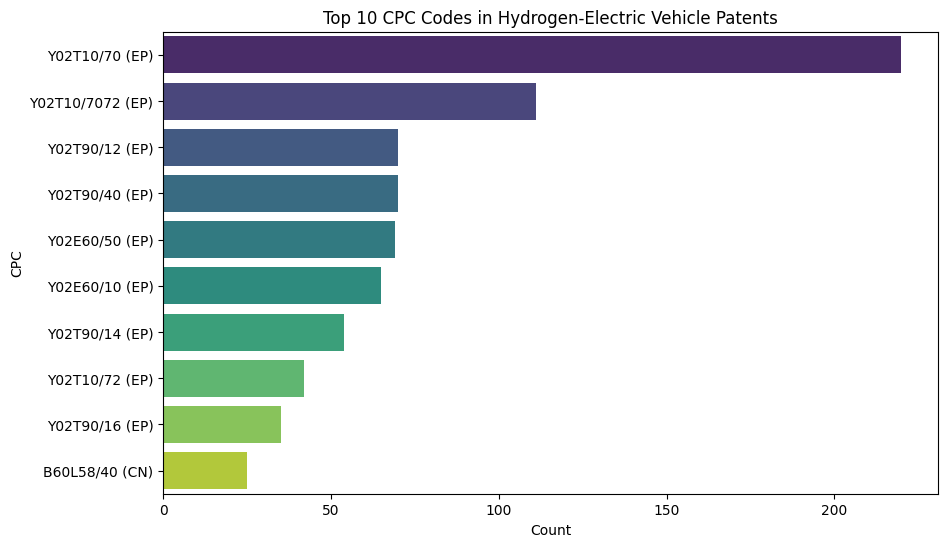

In [150]:
# Split CPC codes by newline characters
#df['CPC'] = df['CPC'].str.split('\n')

# Flatten CPC codes (remove empty strings and strip whitespace)
all_cpc = [code.strip() for sublist in df['CPC'].dropna() for code in sublist if code.strip()]

# Count CPC frequencies
cpc_counts = Counter(all_cpc).most_common(10)
cpc_df = pd.DataFrame(cpc_counts, columns=['CPC', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='CPC', data=cpc_df, palette='viridis')
plt.title('Top 10 CPC Codes in Hydrogen-Electric Vehicle Patents')
plt.show()

C:\Users\tasni\AppData\Local\Temp\ipykernel_27924\551519704.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='CPC', data=cpc_df, palette='viridis')


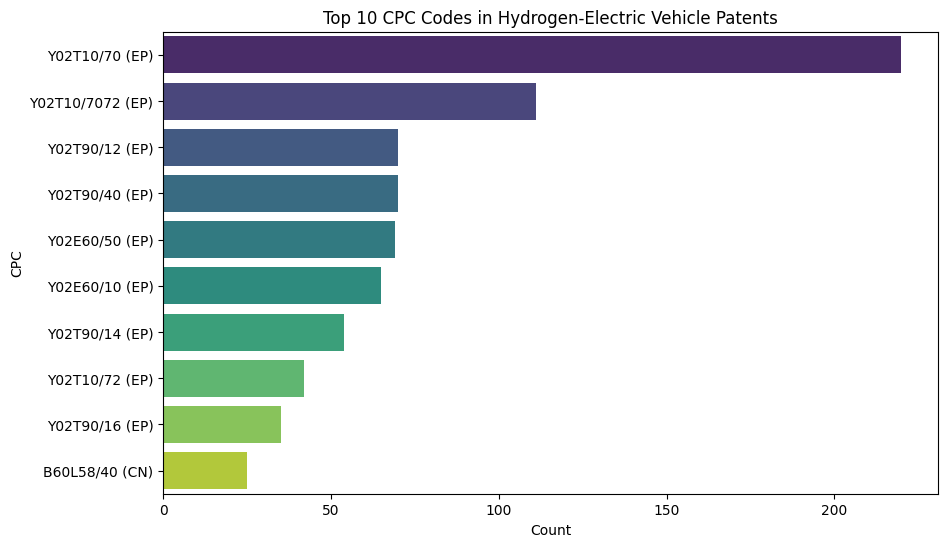

In [151]:
# Flatten all CPC codes
all_cpc = [code.strip() for sublist in df['CPC'].dropna() for code in sublist]

# Count CPC frequencies
cpc_counts = Counter(all_cpc).most_common(10)
cpc_df = pd.DataFrame(cpc_counts, columns=['CPC', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='CPC', data=cpc_df, palette='viridis')
plt.title('Top 10 CPC Codes in Hydrogen-Electric Vehicle Patents')
plt.show()

C:\Users\tasni\AppData\Local\Temp\ipykernel_27924\1291355702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Main CPC', data=main_cpc_df, palette='plasma')


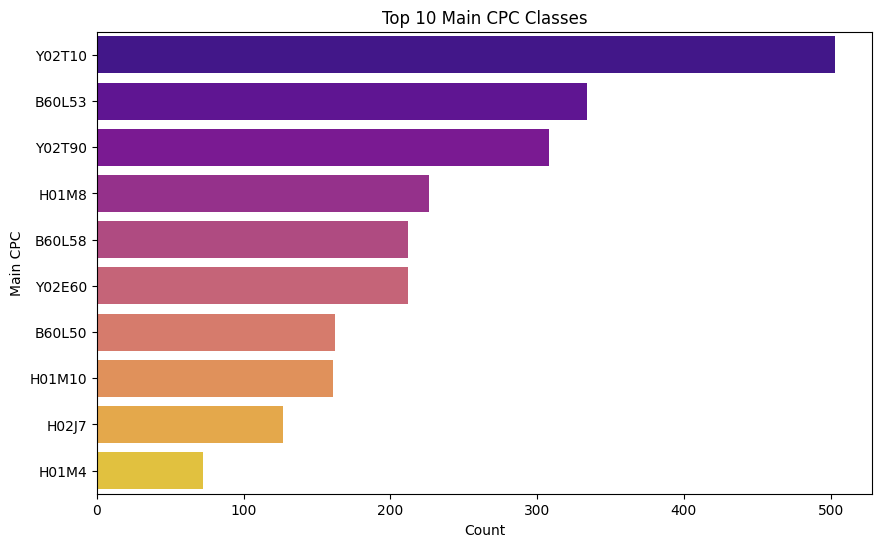

In [152]:
# Extract main CPC classes (e.g., B60L from B60L53/14)
main_cpc = [code.split('/')[0] for code in all_cpc]

# Count main CPC frequencies
main_cpc_counts = Counter(main_cpc).most_common(10)
main_cpc_df = pd.DataFrame(main_cpc_counts, columns=['Main CPC', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Main CPC', data=main_cpc_df, palette='plasma')
plt.title('Top 10 Main CPC Classes')
plt.show()

geographical analysis 

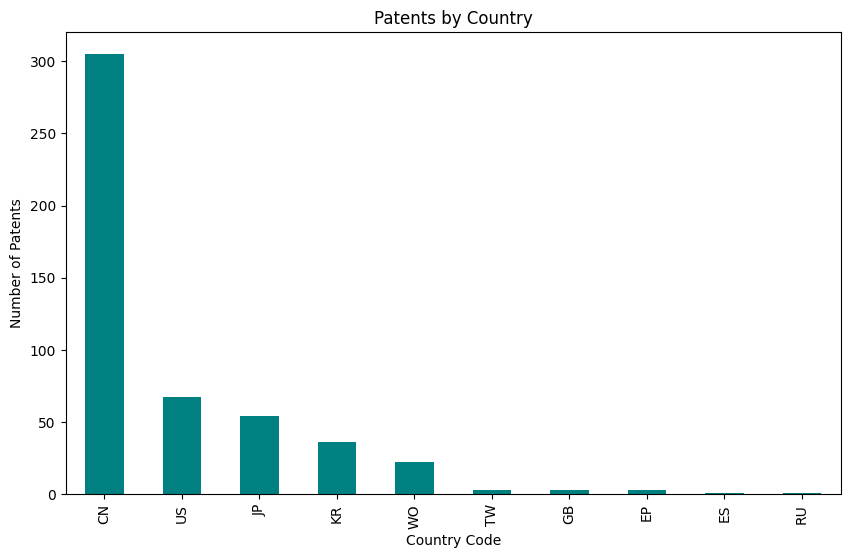

In [153]:
# Extract country codes
df['Country'] = df['Publication number'].str[:2]

# Count patents by country
country_counts = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='teal')
plt.title('Patents by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Patents')
plt.show()

trend over time

C:\Users\tasni\AppData\Local\Temp\ipykernel_27924\4162589146.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year


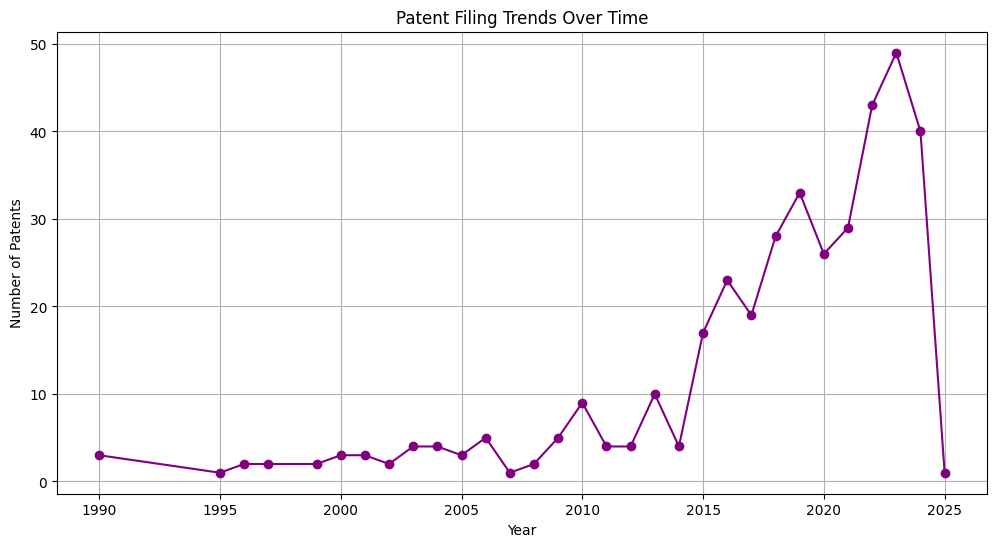

In [154]:
# Extract year from publication date (assuming format: 'YYYY-MM-DD')
df['Publication Year'] = pd.to_datetime(df['Publication date'], errors='coerce', infer_datetime_format=True).dt.year

# Count patents by year
yearly_counts = df['Publication Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Patent Filing Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.grid(True)
plt.show()


word cloud for innovation themes

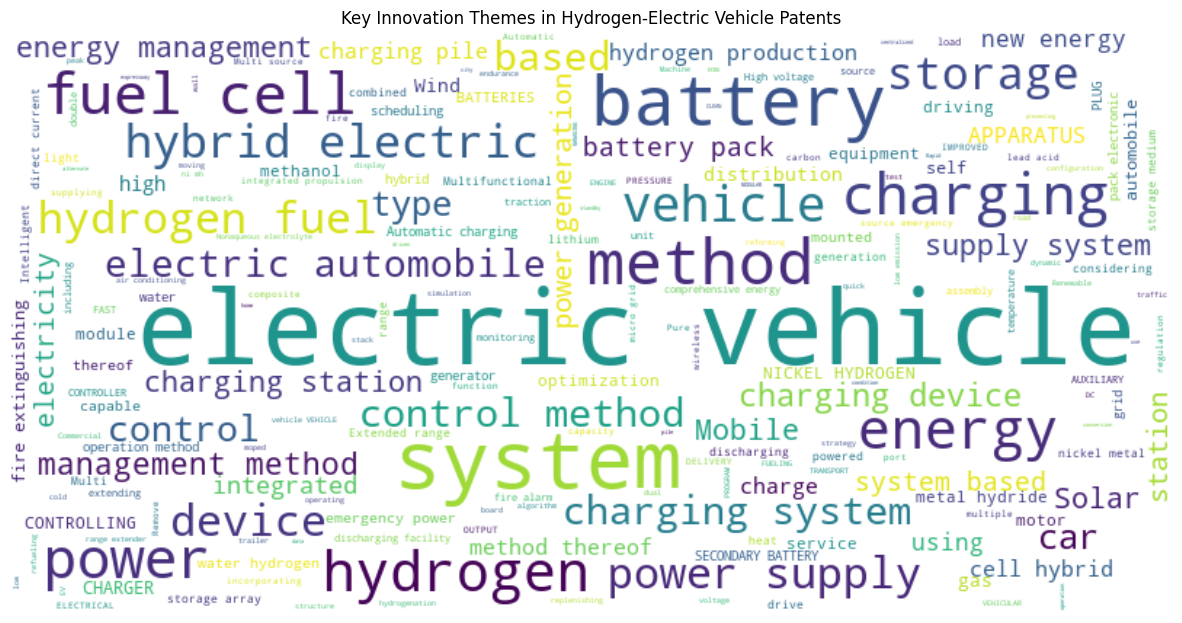

In [155]:
# Combine all titles
text = ' '.join(df['Title'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Key Innovation Themes in Hydrogen-Electric Vehicle Patents')
plt.show()

In [156]:
# Check for any empty or missing inventor data
print(df['Inventors'].isna().sum())


0


In [157]:
# Check number of nodes and edges in the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 130
Number of edges: 134


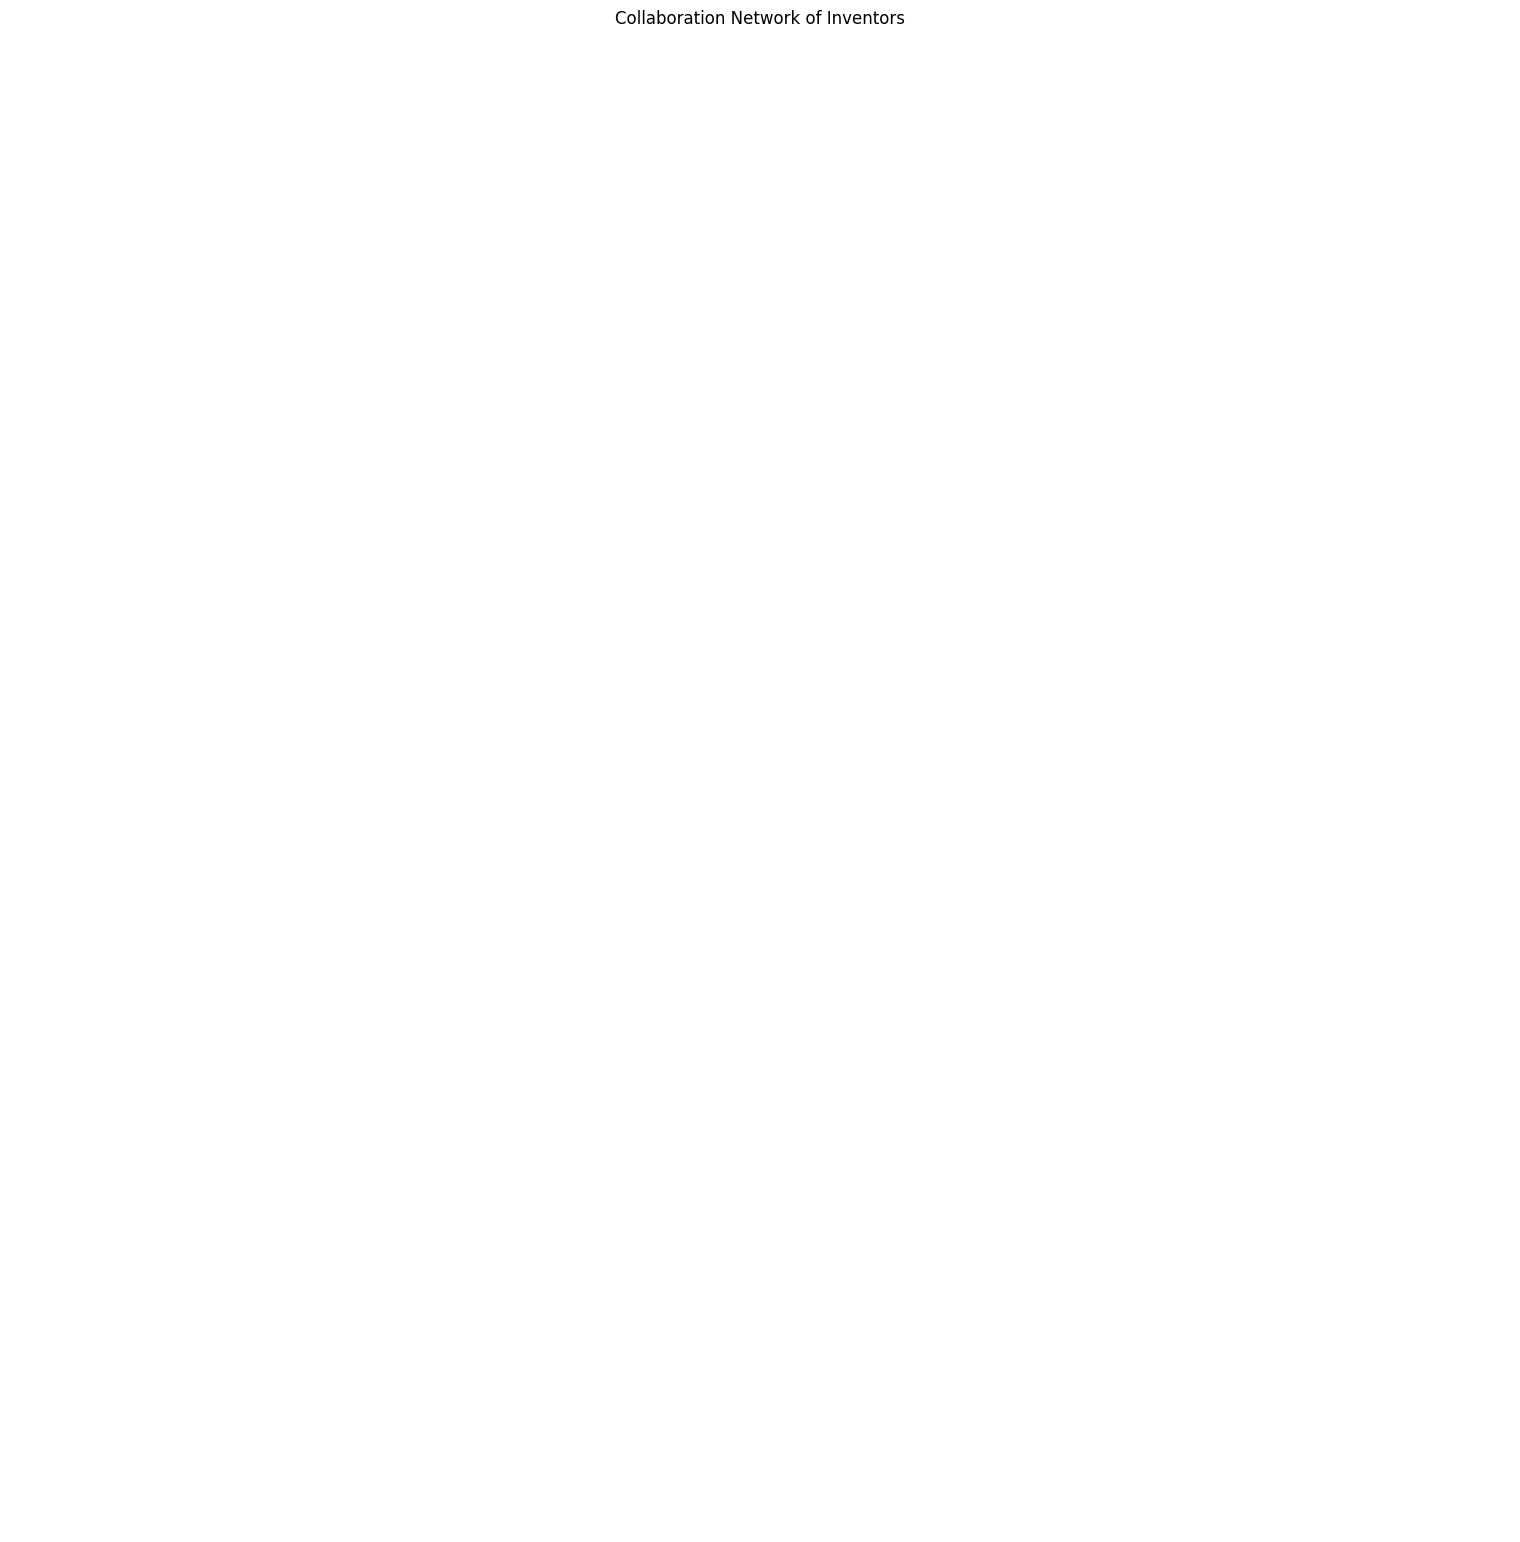

In [158]:
# Install networkx if needed

import networkx as nx

# Create a co-inventor network
G = nx.Graph()

for inventors in df['Inventors'].dropna():
    inventors_list = [inv.strip() for inv in inventors.split(';')]
    for i in range(len(inventors_list)):
        for j in range(i+1, len(inventors_list)):
            if G.has_edge(inventors_list[i], inventors_list[j]):
                G[inventors_list[i]][inventors[j]]['weight'] += 1
            else:
                G.add_edge(inventors_list[i], inventors_list[j], weight=1)

# Visualize the network
plt.figure(figsize=(15, 15))
nx.draw(G, with_labels=True, node_size=50, font_size=8, alpha=0.6)
plt.title('Collaboration Network of Inventors')
plt.show()

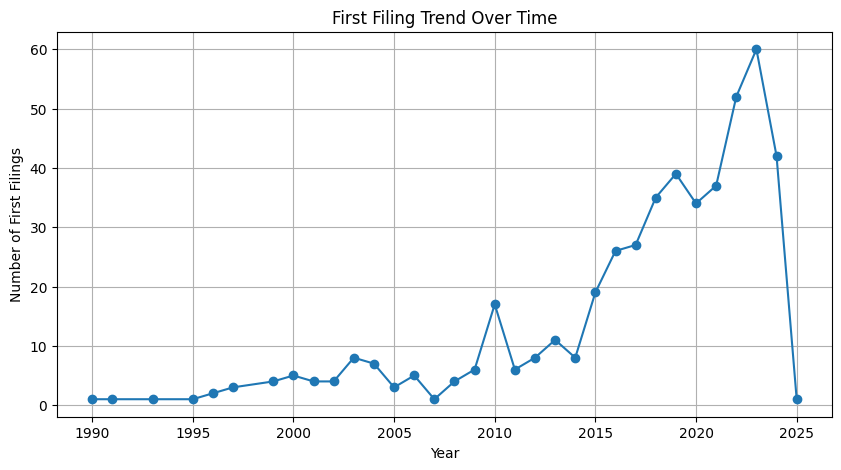

In [159]:
import matplotlib.pyplot as plt

# Count number of first filings per year
filing_counts = df_first_filing['first filing year'].value_counts().sort_index()

# Plot first filing trend
plt.figure(figsize=(10, 5))
plt.plot(filing_counts.index, filing_counts.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of First Filings")
plt.title("First Filing Trend Over Time")
plt.grid(True)
plt.show()
